In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;


In [ ]:
train = pd.read_csv("msc_training_dataset course work.csv")
test = pd.read_csv("msc_testing_dataset (1).csv")

In [ ]:
train.head()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,3,1,2,1,1,0,1,0,0,1,1,6835
1,5,2,2,2,1,0,0,0,0,1,1,9005
2,5,2,2,2,1,0,0,0,0,1,1,9005
3,1,2,1,2,0,0,0,0,1,1,0,5105
4,2,1,2,3,1,1,0,0,1,1,0,9105


In [ ]:
test.head()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,1,1,1,3,0,0,1,1,0,1,0,5068
1,5,1,1,2,0,0,0,0,0,1,1,7658
2,5,1,1,3,0,0,0,1,1,1,1,11318
3,4,2,2,1,0,1,1,0,0,1,0,8858
4,5,2,1,1,0,1,1,1,0,0,1,11178


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   room          3000 non-null   int64
 1   bathroom      3000 non-null   int64
 2   kitchen       3000 non-null   int64
 3   french_door   3000 non-null   int64
 4   backyard      3000 non-null   int64
 5   furnished     3000 non-null   int64
 6   green_paint   3000 non-null   int64
 7   solar_power   3000 non-null   int64
 8   woodfloor     3000 non-null   int64
 9   qlm_security  3000 non-null   int64
 10  club_access   3000 non-null   int64
 11  price         3000 non-null   int64
dtypes: int64(12)
memory usage: 281.4 KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   room          999 non-null    int64
 1   bathroom      999 non-null    int64
 2   kitchen       999 non-null    int64
 3   french_door   999 non-null    int64
 4   backyard      999 non-null    int64
 5   furnished     999 non-null    int64
 6   green_paint   999 non-null    int64
 7   solar_power   999 non-null    int64
 8   woodfloor     999 non-null    int64
 9   qlm_security  999 non-null    int64
 10  club_access   999 non-null    int64
 11  price         999 non-null    int64
dtypes: int64(12)
memory usage: 93.8 KB


### Modelling

In [ ]:
correlation = train.corr()

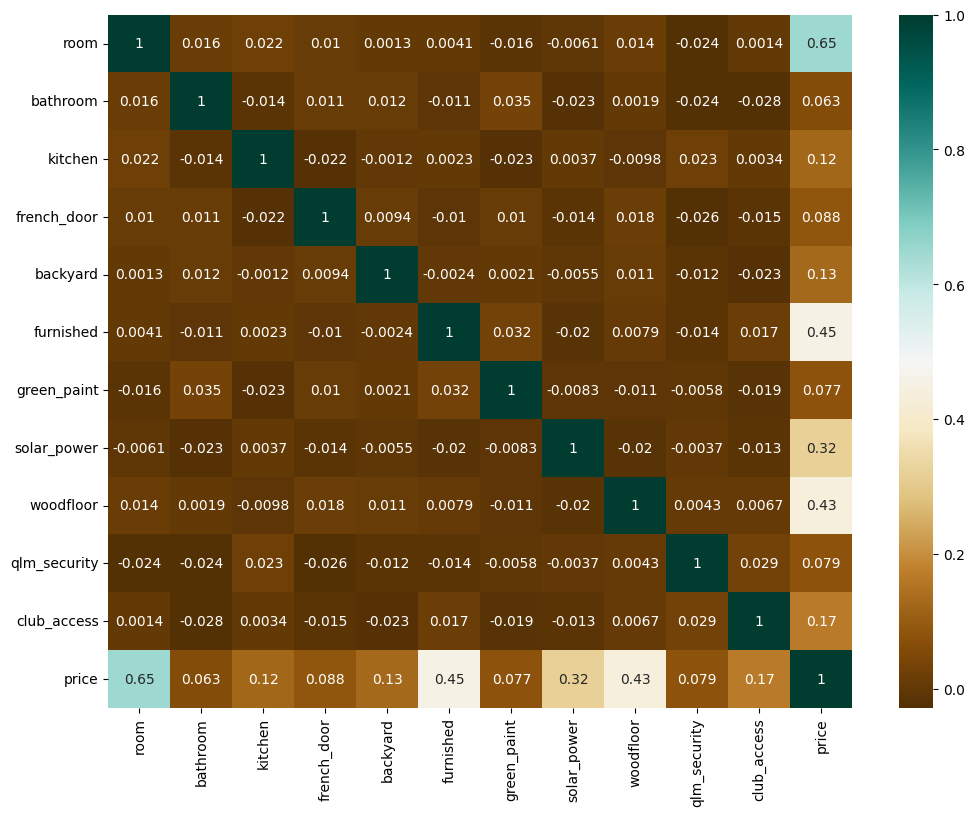

In [ ]:
plt.figure(figsize=(12, 9))
sns.heatmap(correlation, cmap='BrBG', annot=True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Lasso, LogisticRegression, LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import SelectFromModel

In [ ]:
X = train.drop('price', axis=1)
y = train['price']
print(X.shape, y.shape)

(3000, 11) (3000,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 20)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2100, 11), (2100,), (900, 11), (900,))

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

sel_ = SelectFromModel(
    LogisticRegression(C=0.5, penalty='l1', solver='liblinear', random_state=10))
sel_.fit(scaler.transform(X_train), y_train)

SelectFromModel(estimator=LogisticRegression(C=0.5, penalty='l1',
                                             random_state=10,
                                             solver='liblinear'))

In [ ]:
sel_.get_support() 

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [ ]:
lasso_model = Lasso(alpha=0.012, fit_intercept=True, max_iter=3000)
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.012, max_iter=3000)

In [ ]:
# Predicting Cross Validation Score
cv_lasso = cross_val_score(estimator = lasso_model, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Test set results
y_pred_lasso_train = lasso_model.predict(X_train)
r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)

# Predicting R2 Score the Test set results
y_pred_lasso_test = lasso_model.predict(X_test)
r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)

# Predicting RMSE the Test set results
rmse_lasso = (np.sqrt(mean_squared_error(y_test, y_pred_lasso_test)))
print('CV: ', cv_lasso.mean())
print('R2_score (train): ', r2_score_lasso_train)
print('R2_score (test): ', r2_score_lasso_test)
print("RMSE: ", rmse_lasso)

CV:  0.9999999988142042
R2_score (train):  0.9999999988357038
R2_score (test):  0.9999999988823783
RMSE:  0.0758122186667998


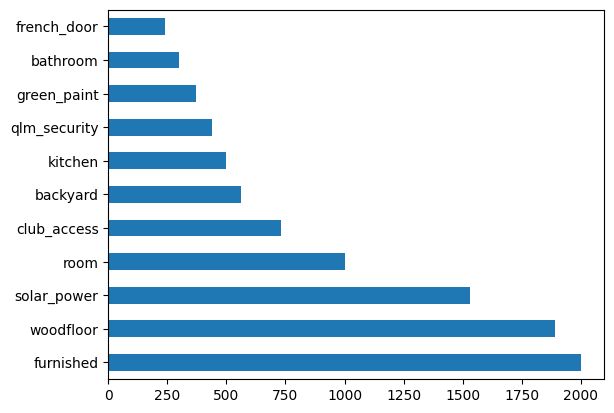

In [ ]:
# Plot Feature Importance for Lasso Model

feat_importances = pd.Series(lasso_model.coef_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [ ]:
# Fitting the Linear Model to the dataset
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predicting Cross Validation Score the Test set results
cv_linear = cross_val_score(estimator = reg, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = reg.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = reg.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_linear)

CV:  1.0
R2_score (train):  1.0
R2_score (test):  1.0
RMSE:  2.899388340230146e-12


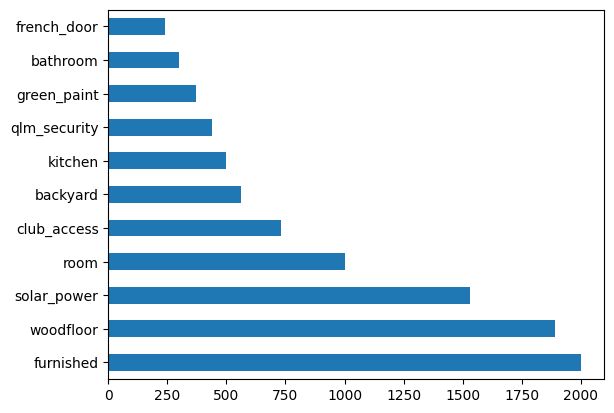

In [ ]:
# Plot Feature Importance for LinearRegression Model

feat_importances = pd.Series(reg.coef_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

### Predict on test dataset

In [ ]:
test_data = test.drop('price', axis=1)
test_data_copy = test_data.copy()

In [ ]:
predicted_sales = reg.predict(test_data)
test['predicted_price'] = predicted_sales

In [ ]:
test.head(20)

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price,predicted_price
0,1,1,1,3,0,0,1,1,0,1,0,5068,5055.0
1,5,1,1,2,0,0,0,0,0,1,1,7658,7645.0
2,5,1,1,3,0,0,0,1,1,1,1,11318,11305.0
3,4,2,2,1,0,1,1,0,0,1,0,8858,8845.0
4,5,2,1,1,0,1,1,1,0,0,1,11178,11165.0
5,5,1,1,2,1,1,1,1,0,1,0,11388,11375.0
6,5,1,2,3,0,0,1,1,1,0,1,11748,11735.0
7,2,1,2,1,0,1,1,0,0,0,1,6848,6835.0
8,2,1,1,3,1,1,1,0,0,1,1,7828,7815.0
9,1,1,1,3,1,0,0,0,1,0,1,5908,5895.0


In [ ]:
print('Mean Absolute Error : {}'.format(mean_absolute_error(test['price'], test['predicted_price'])))
print()
print('Mean Squared Error : {}'.format(mean_squared_error(test['price'], test['predicted_price'])))
print()
print('Root Mean Squared Error : {}'.format(np.sqrt(mean_squared_error(test['price'], test['predicted_price']))))
print()
print('R2_score: {}'.format(r2_score(test['price'], test['predicted_price'])))

Mean Absolute Error : 13.000000000000002

Mean Squared Error : 169.00000000000006

Root Mean Squared Error : 13.000000000000002

R2_score: 0.9999656095212318


In [ ]:
test.to_csv('testing_dataset_with_predicted_prices.csv', encoding='utf-8', index=False)